In [1]:
import matplotlib.pyplot as plt
import os
import codecs
import urllib2
import json
import re
import io
import copy
import nltk, re, pprint
from wordcloud import WordCloud, STOPWORDS

<H2> Review Word-Clouds <H2>

We are very interested in knowing more about the textual content of movie user-reviews. In particular we want to know more about trends of most common used words and whether they differ greatly between genres.

To get an idea of the most common words in used for each genre in their reviews we will utilize the WordCloud module. These WordClouds will visualize which words that characterize each genre and we can then make a general review WordCloud that encompasses all reviews to see if there are similarities.

In [2]:
#The review-text's will heavily favor stop-words and very common words in movie-reviews such as "movie" "film",
#but they tells us nothing about the genre so we will filter them out.
more_stopwords = {'movie', 'film', 'one'}
STOPWORDS = STOPWORDS.union(more_stopwords)

During our Data-formatting we made text files for each genre contaning the movie-id's for all movies that is tagged
with a specific genre-tag. We can now loop through each file and get the review text. Combining all the text we can then make the WordClouds.

WordCloud for the genre: Action


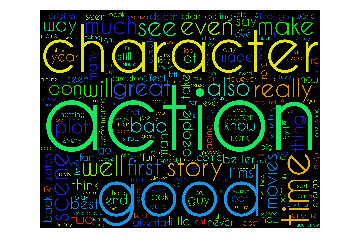

WordCloud for the genre: Adult


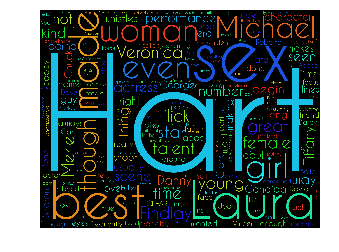

WordCloud for the genre: Adventure


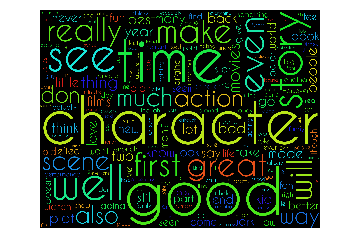

WordCloud for the genre: Animation


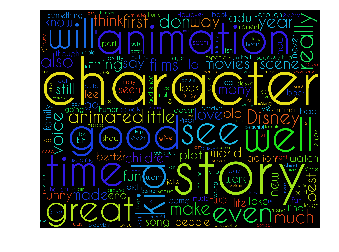

WordCloud for the genre: Biography


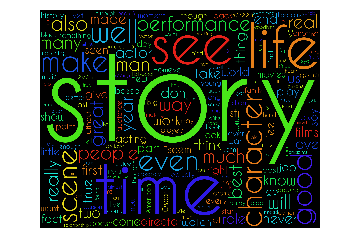

WordCloud for the genre: Comedy


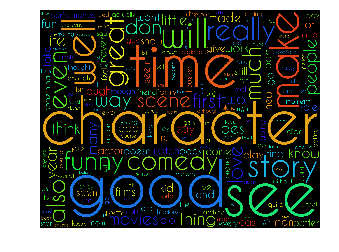

WordCloud for the genre: Crime


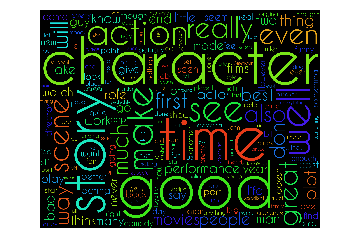

WordCloud for the genre: Documentary


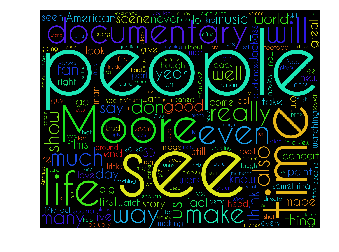

WordCloud for the genre: Drama


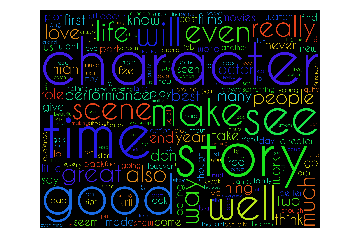

WordCloud for the genre: Family


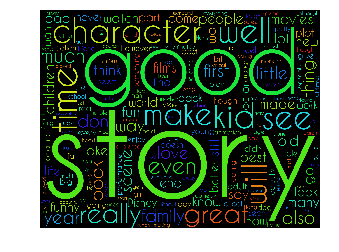

WordCloud for the genre: Fantasy


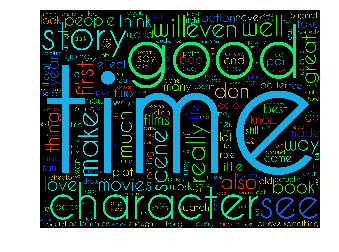

WordCloud for the genre: History


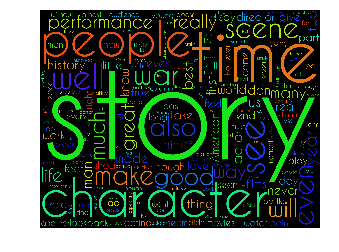

WordCloud for the genre: Horror


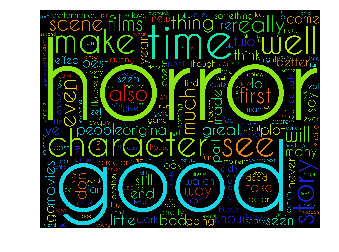

WordCloud for the genre: Music


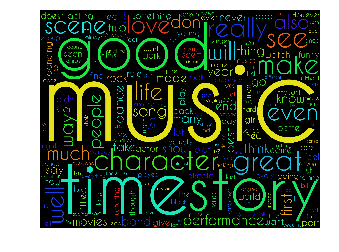

WordCloud for the genre: Musical


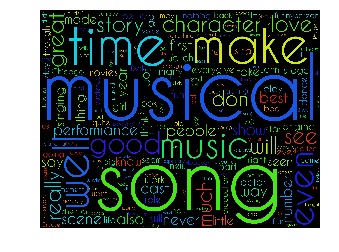

WordCloud for the genre: Mystery


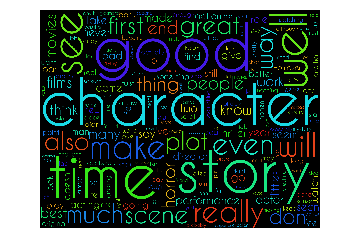

WordCloud for the genre: News


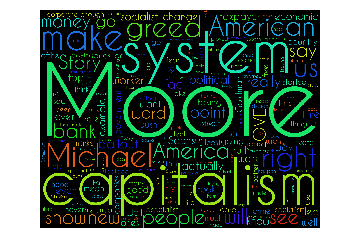

WordCloud for the genre: Romance


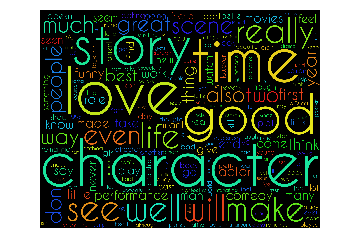

WordCloud for the genre: Sci-Fi


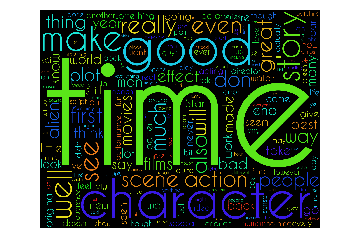

WordCloud for the genre: Sport


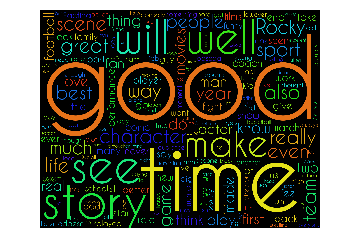

WordCloud for the genre: Thriller


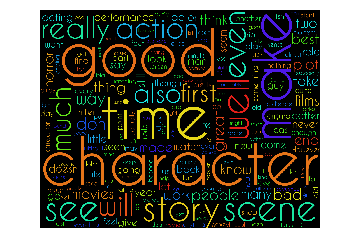

WordCloud for the genre: War


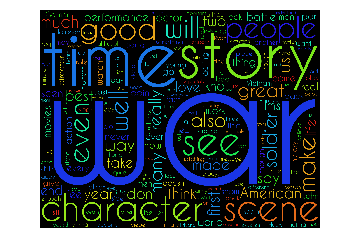

WordCloud for the genre: Western


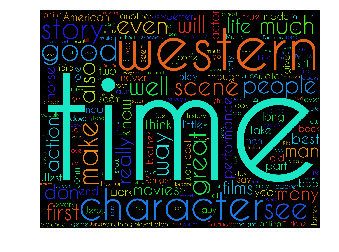

In [8]:
#loop through all genres
for genretype in os.listdir('GenreList'):
    moviesInGenre =  []
    with open("GenreList/"+ genretype) as f:
        #Get all lines of review text and remove end of lines
        moviesInGenre = f.readlines()
        moviesInGenre = [x.strip() for x in moviesInGenre] 
        Genre_Words = ""
        #Get all the review texts and join them into one
        for idd in moviesInGenre:
            with codecs.open("DoneMoviesReviews/" + idd + ".txt", "r", "utf-8") as myfile:
                #Remove unnecessary characters
                data=myfile.read().replace('\n', '')
                data=data.replace("<|_=00=_|>", "")
                data = re.sub('[^a-zA-Z0-9-_*.]', ' ', data)
                Genre_Words = Genre_Words + ''.join(data.encode('utf-8')) 
        #Create a WordCloud based on the entire review text and utilize the bag of stopwords.
        print "WordCloud for the genre:"+ " " +genretype[:-4]
        wordcloud = WordCloud(
                              font_path='CaviarDreams.ttf',
                              stopwords=STOPWORDS,
                              background_color='black',
                              width=1800,
                              height=1400
                             ).generate(Genre_Words)

        plt.imshow(wordcloud)
        plt.axis('off')
        plt.savefig('./'+ genretype[:-4]+ '.png', dpi=300)
        plt.show()        

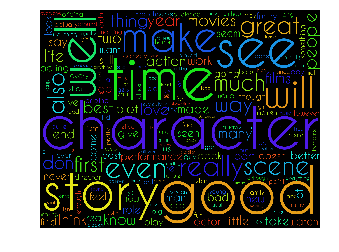

In [5]:
#Get all review texts
for f in os.listdir("DoneMoviesReviews/"):
    with codecs.open("DoneMoviesReviews/" + f[:-4] + ".txt", "r", "utf-8") as myfile:
        data=myfile.read().replace('\n', '')
        data=data.replace("<|_=00=_|>", "")
        data = re.sub('[^a-zA-Z0-9-_*.]', ' ', data)
        Genre_Words = Genre_Words + ''.join(data.encode('utf-8')) 
#Make a WordCloud for all reviews        
wordcloud = WordCloud(
                      font_path='CaviarDreams.ttf',
                      stopwords=STOPWORDS,
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(Genre_Words)

plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./AllGenre.png', dpi=300)
plt.show()        

It seems that most reviews across all genres will, more or less promiently, contain words such as: Character, Story, Time and Good. This makes sense as they usually are words necessary for describing a movie i.e. if they had to reference a character or whether they thought the story was good or bad. The commonality of these words are also show in the WordCloud for the combined review text, where they are among the major words used. 

However as there exist very common words shared between the genrne reviews, there are also some genre WordClouds that show some very distinct words that clearly seperates them and makes them easier to classify.
Some good examples of this is the News-Genre where the major words are several hot topic terms, most of which reference the market crash of 0'8 such as: Michael Moore, capitalism, America(n), Greed, Banks etc. The Romance genre also was easy to classify as it love among its most prominent used terms while the Animation reviews used the terms Kid and Disney alot.

So in conclusion the overall result of the WordClouds was mixed. We had hoped for the WordClouds to be more distinct in their characteriziation of their individual genres, but alot of them such as the Action genre didn't show many words one would distinctivly associate with the genre. We, however, still got some WordClouds which we would be able to label even without knowing the genre beforehand so it wasn't completly useless. 